In [495]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
import pywt
from scipy import signal
from termcolor import colored
%matplotlib inline

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [496]:
#pip install termcolor

# Data Upload

In [497]:
def convert_trc_to_csv(filename):
    # Read the file as text file
    f = open(filename, 'r', encoding='cp949')
    content = f.read()
    f.close()

    # Process rows
    start_line = 18
    raw_data = content.split('\n')[start_line:]
    raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))[:-1]
    raw_data = content.split('\n')[18:]
    raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))

    # Convert to pandas
    df = pd.DataFrame(raw_data, columns=columns)
    df['Time'] = df['Time'].astype('float')

    # Change the file extension to csv
    csv_file = filename.split('.')

In [622]:
filename = "Attack Data/Tesla/2022.03.18 16시 48분  P-CAN Tesla Dos (갈때 30).trc"
f = open(filename, 'r', encoding='cp949')
content = f.read()
type(content)

str

In [623]:
raw_data = content.split('\n')[18:]
raw_data = list(map(lambda r: r.strip().split()[1:], raw_data))
raw_data

[['1.3', 'Rx', '018A', '8', 'B6', '31', '8D', 'D3', '35', '8D', 'D3', '05'],
 ['1.5', 'Rx', '0256', '8', 'B5', 'C1', '14', '85', '03', '00', '00', '00'],
 ['1.9', 'Rx', '0108', '8', '7C', 'B1', '00', '5A', '00', '64', '04', '00'],
 ['2.1', 'Rx', '0136', '8', 'AD', '5F', '00', '00', 'E1', '13', '1C', '53'],
 ['2.3', 'Rx', '0142', '5', '44', '01', '00', '00', '00'],
 ['2.6', 'Rx', '0118', '8', '5D', '01', '85', '18', '26', '80', '00', '00'],
 ['2.8', 'Rx', '0299', '8', 'A4', '09', '00', '00', '00', '00', '00', '00'],
 ['3.1', 'Rx', '0101', '8', 'B9', 'FB', '2A', '80', '08', '40', '85', '2D'],
 ['3.3', 'Rx', '0111', '8', '56', 'FE', '0E', 'FD', 'D6', '00', '87', 'CE'],
 ['3.5', 'Rx', '0206', '8', '00', '00', '00', '00', '00', '00', '90', '98'],
 ['3.8', 'Rx', '0148', '8', 'B2', '09', '00', '40', '12', '00', '0E', '00'],
 ['4.0', 'Rx', '0257', '8', '29', '59', '2A', '0F', '3E', '00', '00', '00'],
 ['4.2', 'Rx', '038E', '6', '15', '4A', '40', '11', '40', '11'],
 ['4.5', 'Rx', '0119', '8', '

In [624]:
columns = ['Time_Ofset', 'Type', 'CAN_ID', 'Data_Length']
columns += [f'Data_{x}' for x in range(8)]

In [625]:
dataframe = pd.DataFrame(raw_data, columns=columns)
dataframe['Time_Ofset'] = dataframe['Time_Ofset'].astype('float')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056108 entries, 0 to 2056107
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Time_Ofset   float64
 1   Type         object 
 2   CAN_ID       object 
 3   Data_Length  object 
 4   Data_0       object 
 5   Data_1       object 
 6   Data_2       object 
 7   Data_3       object 
 8   Data_4       object 
 9   Data_5       object 
 10  Data_6       object 
 11  Data_7       object 
dtypes: float64(1), object(11)
memory usage: 188.2+ MB


In [626]:
from sklearn.preprocessing import LabelEncoder
dataframe['Time_Gap'] = dataframe['Time_Ofset'].diff(1)
dataframe['Scaled_CAN_ID'] = pd.DataFrame(dataframe['CAN_ID']).apply(LabelEncoder().fit_transform)
dataframe = dataframe.dropna(subset=['Time_Gap'])
dataframe 

,Time_Ofset,Type,CAN_ID,Data_Length,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Time_Gap,Scaled_CAN_ID
1,1.5,Rx,0256,8,B5,C1,14,85,03,00,00,00,0.2,29
2,1.9,Rx,0108,8,7C,B1,00,5A,00,64,04,00,0.4,6
3,2.1,Rx,0136,8,AD,5F,00,00,E1,13,1C,53,0.2,13
4,2.3,Rx,0142,5,44,01,00,00,00,None,None,None,0.2,14
5,2.6,Rx,0118,8,5D,01,85,18,26,80,00,00,0.3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056102,649994.0,Rx,038D,7,8A,08,00,00,00,70,46,None,0.2,51
2056103,649994.3,Rx,0105,8,00,00,00,00,70,06,C0,3C,0.3,5
2056104,649994.5,Rx,011D,8,AA,0C,00,00,00,00,80,00,0.2,11
2056105,649994.7,Rx,0145,8,B4,4C,00,C8,54,00,06,00,0.2,15


In [627]:
from sklearn.preprocessing import LabelEncoder
labelecoder_df = LabelEncoder()
x = pd.DataFrame(dataframe['CAN_ID']).apply(LabelEncoder().fit_transform)

Text(0.5, 1.0, 'Data Cangeing Pattern According to Time Gap')

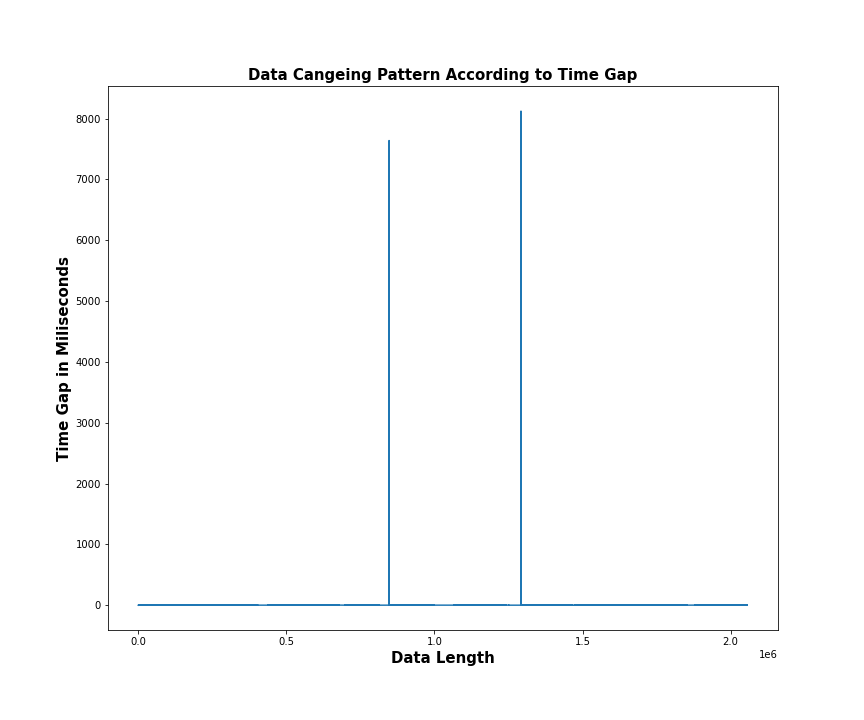

In [628]:
plt.subplots(figsize = (12, 10))
plt.plot(dataframe['Time_Gap'])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Data Cangeing Pattern According to Time Gap", fontsize=15,  weight='bold')

Text(0.5, 1.0, 'Data Cangeing Pattern According to Time Gap')

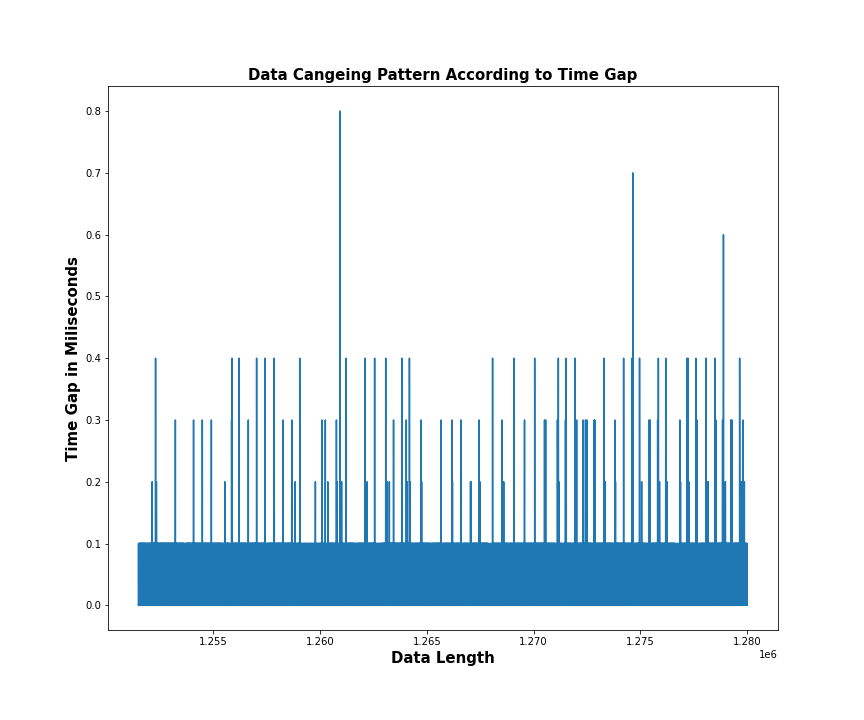

In [643]:
plt.subplots(figsize = (12, 10))
plt.plot(dataframe['Time_Gap'][1251500:1280000])
plt.xlabel("Data Length", fontsize=15,  weight='bold')
plt.ylabel("Time Gap in Miliseconds", fontsize=15,  weight='bold')
plt.title("Data Cangeing Pattern According to Time Gap", fontsize=15,  weight='bold')

In [644]:
a = dataframe[813800:846000]
b = dataframe[1251500:1288000]


Tesla_DoS = pd.concat([a, b, c, d], axis=0, ignore_index=True)
Tesla_DoS['Label'] = str('DoS')
Tesla_DoS

,Time_Ofset,Type,CAN_ID,Data_Length,Data_0,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Time_Gap,Scaled_CAN_ID,Label
0,259919.9,Rx,0000,8,00,04,81,00,C0,02,20,4D,0.0,0,DoS
1,259919.9,Rx,0000,8,00,04,81,00,C0,02,20,4D,0.0,0,DoS
2,259919.9,Rx,0000,8,00,04,81,00,C0,02,20,4D,0.0,0,DoS
3,259919.9,Rx,0000,8,00,04,81,00,C0,02,20,4D,0.0,0,DoS
4,259919.9,Rx,0000,8,00,04,81,00,C0,02,20,4D,0.0,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101695,387546.0,Rx,0148,8,F3,04,00,00,90,00,16,00,0.2,16,DoS
101696,387546.2,Rx,0129,8,70,24,F0,5F,FD,1F,FF,3F,0.2,12,DoS
101697,387546.5,Rx,0257,8,4B,24,36,1E,7A,00,00,00,0.3,30,DoS
101698,387546.7,Rx,0119,8,6E,04,00,00,00,00,00,50,0.2,9,DoS


In [645]:
pd.value_counts(Tesla_DoS.CAN_ID)

0000    68700
0051     1055
038D     1055
0175     1055
0129     1055
        ...  
0267       11
0421       11
0392       10
03D1       10
04F1        9
Name: CAN_ID, Length: 70, dtype: int64

In [646]:
#Tesla_DoS.to_csv ('Tesla_DoS_1.csv', index = False)

In [684]:
Kia_DoS = pd.read_csv("Tesla_Replay_2.csv")

In [685]:
up = float(Kia_DoS['Time_Ofset'][0])
low = up + 10
output = []
for i in Kia_DoS.Time_Ofset:
    if  float(i) <= low:
        out = Kia_DoS[(Kia_DoS['Time_Ofset'] >= float(up)) & (Kia_DoS['Time_Ofset'] <= float(low))]
        if len(out) == 0:
            break
        else:
            output.append(out[['Scaled_CAN_ID']])
        
    up = low
    low = low + 10
len(output)

320

In [686]:
Input_Data = output
Wvaelet_Family = 'db2'
Label = 2
Mode = 'periodic'

In [687]:
wave_out1 = []
wave_out2 = []
wave_out3 = []
for i in output:
    a, b, c = pywt.wavedec(i, Wvaelet_Family, level = Label, mode = Mode)
    wave_out1.append(a)
    wave_out2.append(b)
    wave_out3.append(c)

C:\Users\Lisa\anaconda3\envs\torch\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [688]:
wave_out = []

for i in output:
    a, b, c = pywt.wavedec(i, Wvaelet_Family, level = Label, mode = Mode)
    wave_out.append(pd.DataFrame((a.flatten(), b.flatten(), c.flatten())).T)

In [689]:
join = wave_out[0]
for z in wave_out:
    join = pd.concat([join, z])
join

,0,1,2
0,102.0,1.776357e-15,0.000000e+00
1,102.0,1.776357e-15,-1.776357e-15
2,104.0,-7.105427e-15,3.552714e-15
3,104.0,-7.105427e-15,1.776357e-15
4,110.0,-1.776357e-15,0.000000e+00
...,...,...,...
9,26.0,-1.776357e-15,4.440892e-16
10,14.0,-6.661338e-16,4.440892e-16
11,14.0,-6.661338e-16,4.440892e-16
12,46.0,1.776357e-15,4.440892e-16


In [682]:
columns = ['cAs1', 'cDs0', 'cDs1'] #approximation coefficient and detal coefficient 

In [690]:
join.to_csv ('Wave_Tesla_Replay_2.csv', index = False)

In [226]:
Kia_DoS_1 = pd.read_csv("Kia_Fuzz_1.csv")
Kia_DoS_2 = pd.read_csv("Kia_Fuzz_2.csv")
Kia_DoS_3 = pd.read_csv("Kia_Fuzz_3.csv")

In [227]:
Kia_DoS = pd.concat([Kia_DoS_1, Kia_DoS_2, Kia_DoS_3], axis=0, ignore_index=True)
#Kia_DoS.to_csv ('Kia_Fuzz.csv', index = False)